
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Beverage-sales.csv')

In [ ]:
df.shape

(400, 2)

In [ ]:
df.columns

Index(['Sales', 'Month'], dtype='object')

In [ ]:
df.head()

,Sales,Month
0,5878.711914,1972-09-01
1,7024.263104,1972-10-01
2,9996.419834,1972-11-01
3,12892.152844,1972-12-01
4,4561.509442,1973-01-01


In [ ]:
df.tail()

,Sales,Month
395,7523.750518,2005-08-01
396,11992.469683,2005-09-01
397,13117.900211,2005-10-01
398,16062.599439,2005-11-01
399,18935.603457,2005-12-01


In [ ]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Sales,Month
0,5878.711914,1972-09-01
1,7024.263104,1972-10-01
2,9996.419834,1972-11-01
3,12892.152844,1972-12-01
4,4561.509442,1973-01-01


In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.describe()

,Sales
count,400.000000
mean,8884.513739
std,3384.573503
min,1676.138577
25%,6470.162107
50%,8439.845892
75%,10487.403578
max,18935.603457


## Step 2: Visualize the Data

<Axes: xlabel='Month'>

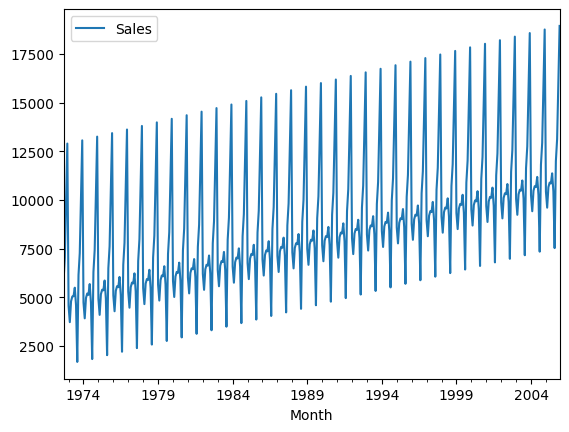

In [ ]:
df.plot()

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['Sales'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df['Sales'])

ADF Test Statistic : 0.6009139480736297
p-value : 0.9876381347620031
#Lags Used : 17
Number of Observations Used : 382
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [ ]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [ ]:
df['Sales'].shift(1)

,Sales
Month,
1972-09-01,NaN
1972-10-01,5878.711914
1972-11-01,7024.263104
1972-12-01,9996.419834
1973-01-01,12892.152844
...,...
2005-08-01,10431.089563
2005-09-01,7523.750518
2005-10-01,11992.469683


In [ ]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -228551653.67044723
p-value : 0.0
#Lags Used : 11
Number of Observations Used : 376
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

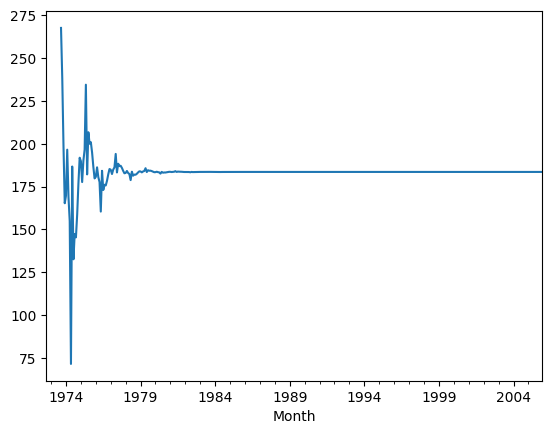

In [ ]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model

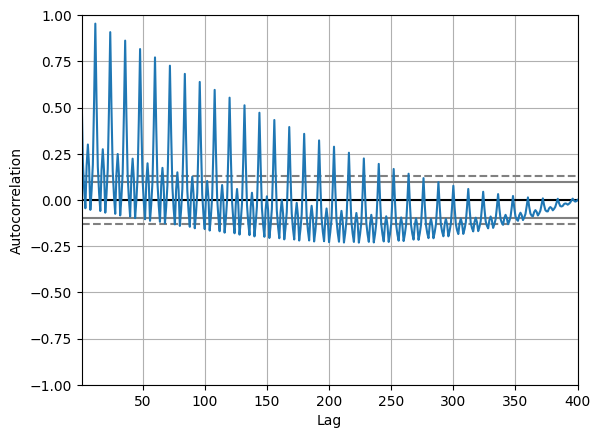

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
df.shape

(400, 3)

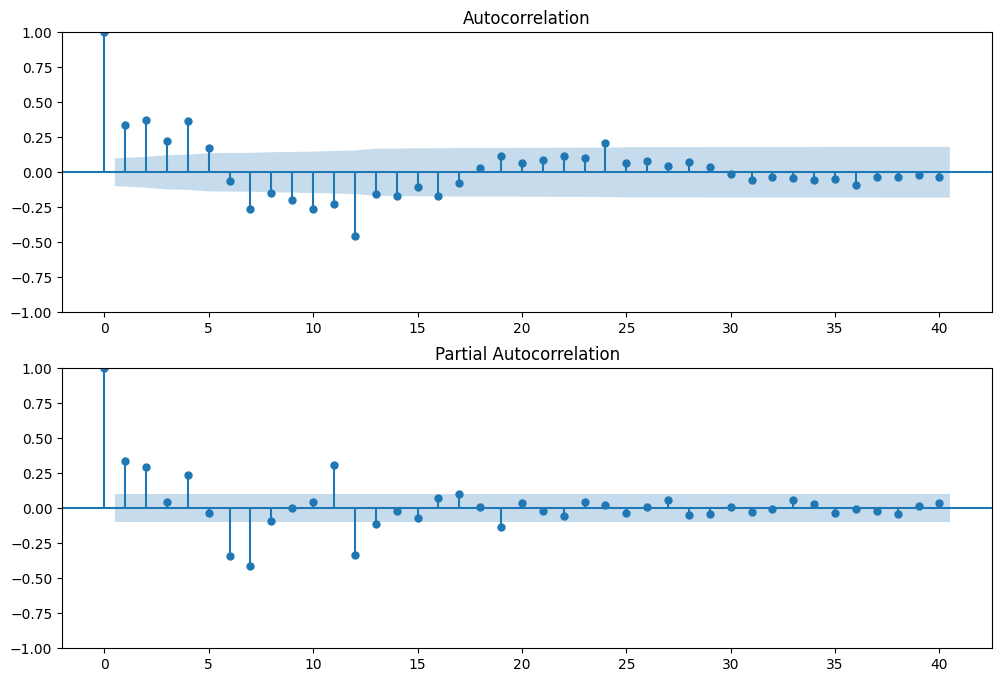

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# df['forecast']=results.predict(start=350,end=395,dynamic=True)
# df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,100)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_df=pd.concat([df,future_datest_df])

<ipython-input-33-4cc8c9eff41a>:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


<Axes: >

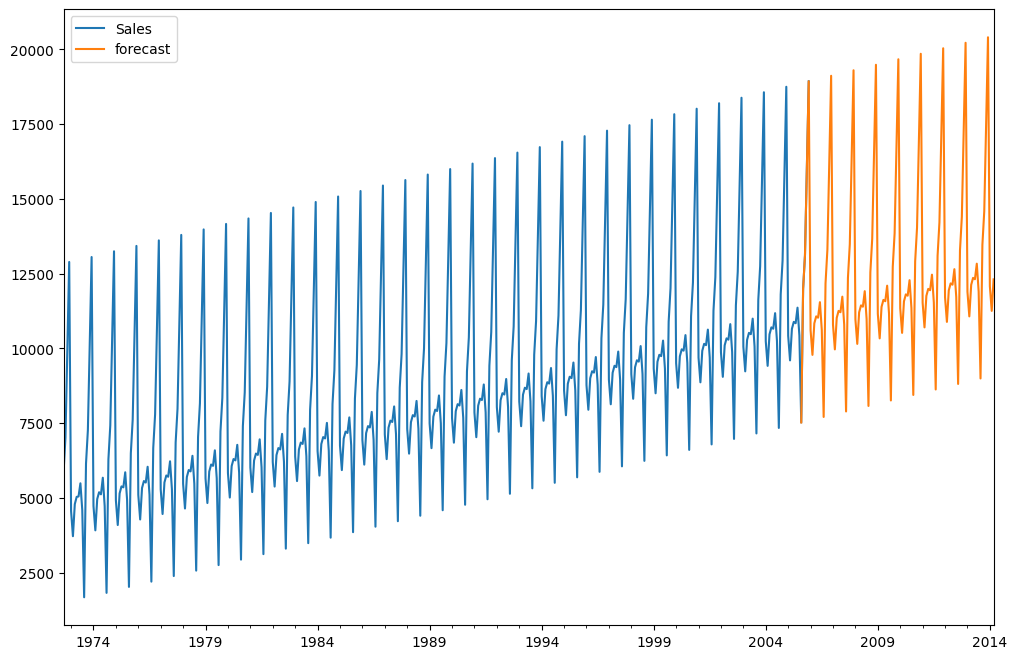

In [ ]:
future_df['forecast'] = results.predict(start = 395 , end =498 , dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [ ]:
future_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
2013-11-01,NaN,NaN,NaN,17534.437694
2013-12-01,NaN,NaN,NaN,20407.692266
2014-01-01,NaN,NaN,NaN,12080.065418
2014-02-01,NaN,NaN,NaN,11255.602043
2014-03-01,NaN,NaN,NaN,12310.466129


In [ ]:
new_df = pd.DataFrame({"Sales": future_df["Sales"] , "forecast" : future_df["forecast"] , "Month" :future_df.index })

In [ ]:
new_df.shape

(499, 3)

In [ ]:
new_df = new_df.reset_index()

In [ ]:
file = open("Sales-forecast.csv", "r")
lines = file.readlines()

In [ ]:
month = "2014-03-01"

In [ ]:
new_df.columns

Index(['index', 'Sales', 'forecast', 'Month'], dtype='object')

In [ ]:
new_df.drop("index" , inplace= True , axis=1)

In [ ]:
new_df.to_csv('Sales-forecast.csv')

In [ ]:
for line in lines:
  if line.strip().split(",")[-1] == month:
    print(line.strip().split(",")[-2])

12310.46612933044


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sales     400 non-null    float64       
 1   forecast  104 non-null    float64       
 2   Month     499 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 11.8 KB


In [ ]:
# prompt: make the new_df's Month column into a string in "Y-m-d" format

new_df['Month'] = new_df['Month'].dt.strftime('%Y-%m-%d')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sales     400 non-null    float64
 1   forecast  104 non-null    float64
 2   Month     499 non-null    object 
dtypes: float64(2), object(1)
memory usage: 11.8+ KB


In [ ]:
# prompt: how to populate a sqlite database with "new_df" dataframe

import sqlite3

# Connect to SQLite database (creates the database if it doesn't exist)
conn = sqlite3.connect('my_database.db')


new_df.to_sql('sales_forecast', conn, if_exists='replace', index=False)

# Close the connection
conn.close()